In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('cape_bin.csv')
df.head()
title = "cape_bin"

In [10]:

brier_scores = pd.DataFrame(columns=["mm", "brierScore"])
ECE = pd.DataFrame(columns=["mm", "ECE"])
KL = pd.DataFrame(columns=["mm", "KL"])
thresholds = [1,5,10,20,50,100,150]
for th in thresholds:
    for d in df[f"Brier score {th} mm"].to_list():
        brier_scores = pd.concat([brier_scores, pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
    for d in df[f"ECE {th} mm"].to_list():
        ECE = pd.concat([ECE, pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
    for d in df[f"KL {th} mm"].to_list():
        KL = pd.concat([KL, pd.DataFrame([[th, d]], columns=["mm", "KL"])], ignore_index=True)

/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_56328/625680837.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  brier_scores = pd.concat([brier_scores, pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_56328/625680837.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ECE = pd.concat([ECE, pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740

[Text(0.5, 1.0, 'cape_bin')]

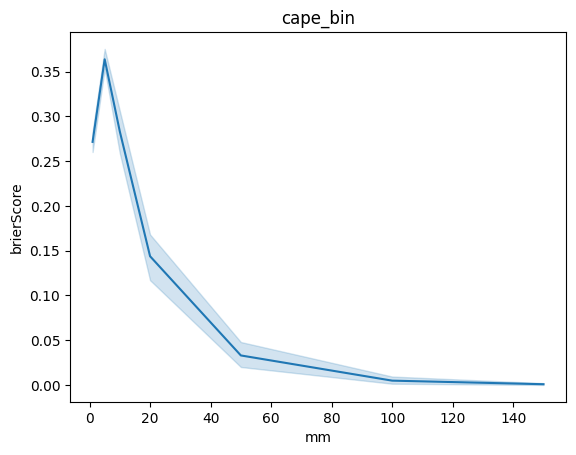

In [11]:

sns.lineplot(data=brier_scores, x="mm", y="brierScore").set(title=title)



[Text(0.5, 1.0, 'cape_bin')]

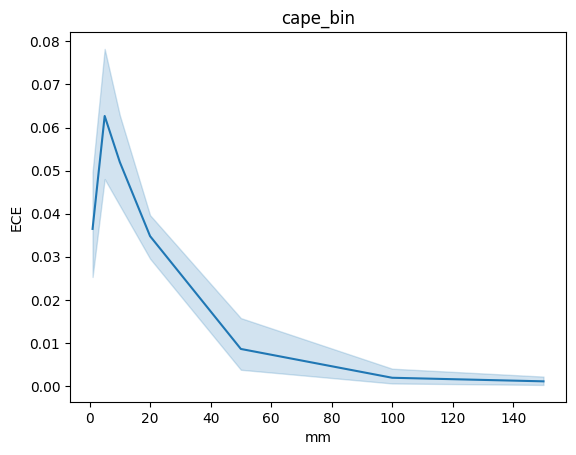

In [12]:
sns.lineplot(data=ECE, x="mm", y="ECE").set(title=title)

[Text(0.5, 1.0, 'cape_bin')]

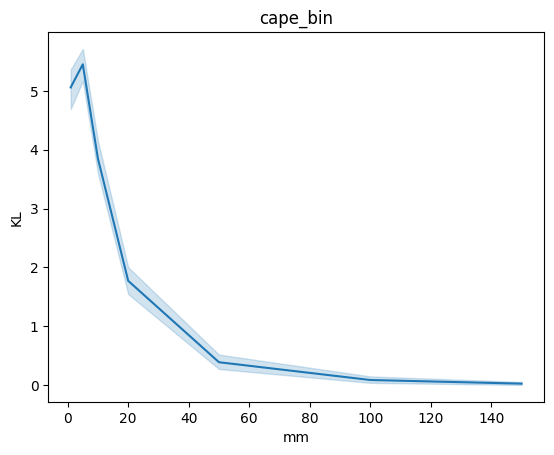

In [13]:
sns.lineplot(data=KL, x="mm", y="KL").set(title=title)

In [14]:
rmse =df["test rmse"].to_numpy()
print(f"rmse mean: {np.mean(rmse):.4f},  var: {np.var(rmse):.4f}")

KeyError: 'test rmse'